In [6]:
import numpy as np
import pandas as pd
import os

languages = [
    'Spanish',
    'English',
    'German',
    'French'
]

file_directory = os.getcwd()
extractedFeatures_folder = 'ExtractedFeatures/'

df_full = pd.DataFrame()
for language in languages:
    df_language = pd.read_csv(file_directory + '/' + extractedFeatures_folder + '/' + language + '.csv', delimiter=";", encoding='utf-8')
    df_language['Class'] = language
    df_full = pd.concat([df_full, df_language], ignore_index=True)
    df_full = df_full.reindex(range(df_full.shape[0]))

X = df_full.drop(['phrase', 'Class'], axis=1)
y = df_full['Class']

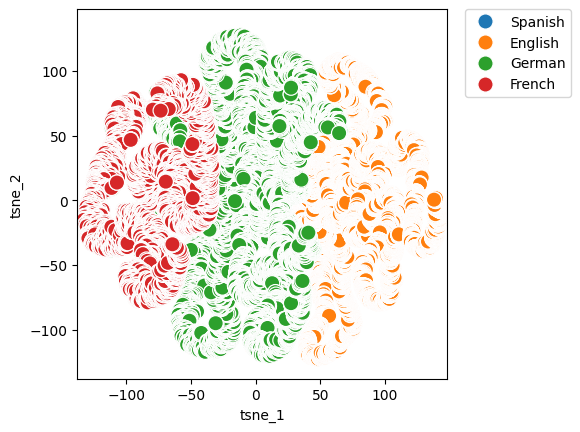

In [7]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})


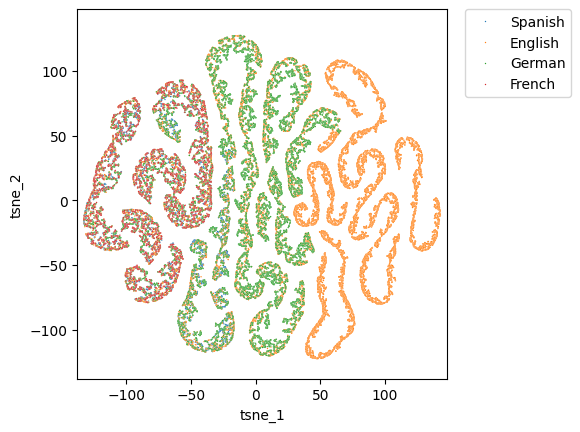

In [10]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=1)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [12]:
train = StandardScaler().fit_transform(x_train)
test = StandardScaler().fit_transform(x_test)

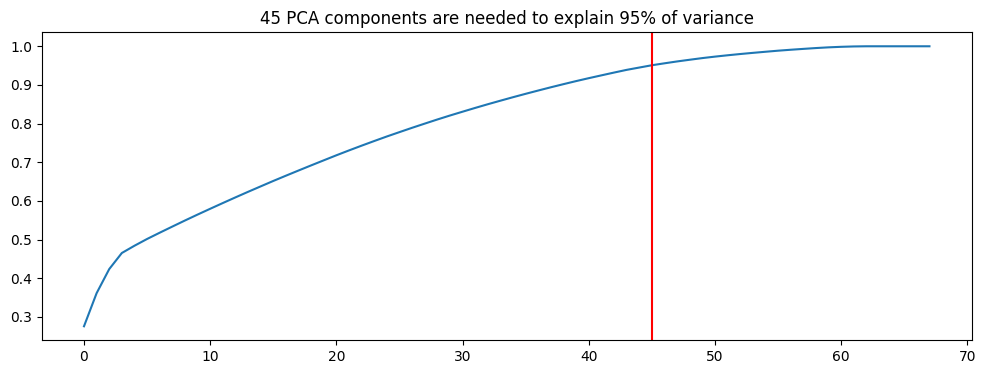

In [13]:
from sklearn.decomposition import PCA

pca_full = PCA(n_components=x_test.shape[1])
pca_full.fit(train)

cummulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Find number of components needed to explain 95% of variance:
ind= np.argwhere(cummulative_variance>0.95)
Ncomponents_95 = ind[0].item()

fig = plt.figure(figsize=(12,4))
plt.plot(cummulative_variance)
plt.axvline(Ncomponents_95,c='r')
plt.title('{} PCA components are needed to explain 95% of variance'.format(Ncomponents_95))
plt.show()

In [23]:
pca95 = PCA(n_components=Ncomponents_95)
pca95_proj = pca95.fit_transform(train)

In [24]:
n_components95 = 2
tsne95 = TSNE(n_components95)
tsne_result95 = tsne95.fit_transform(pca95_proj)
tsne_result_df_95 = pd.DataFrame({'tsne_1': tsne_result95[:,0], 'tsne_2': tsne_result95[:,1], 'label': y_train})

<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

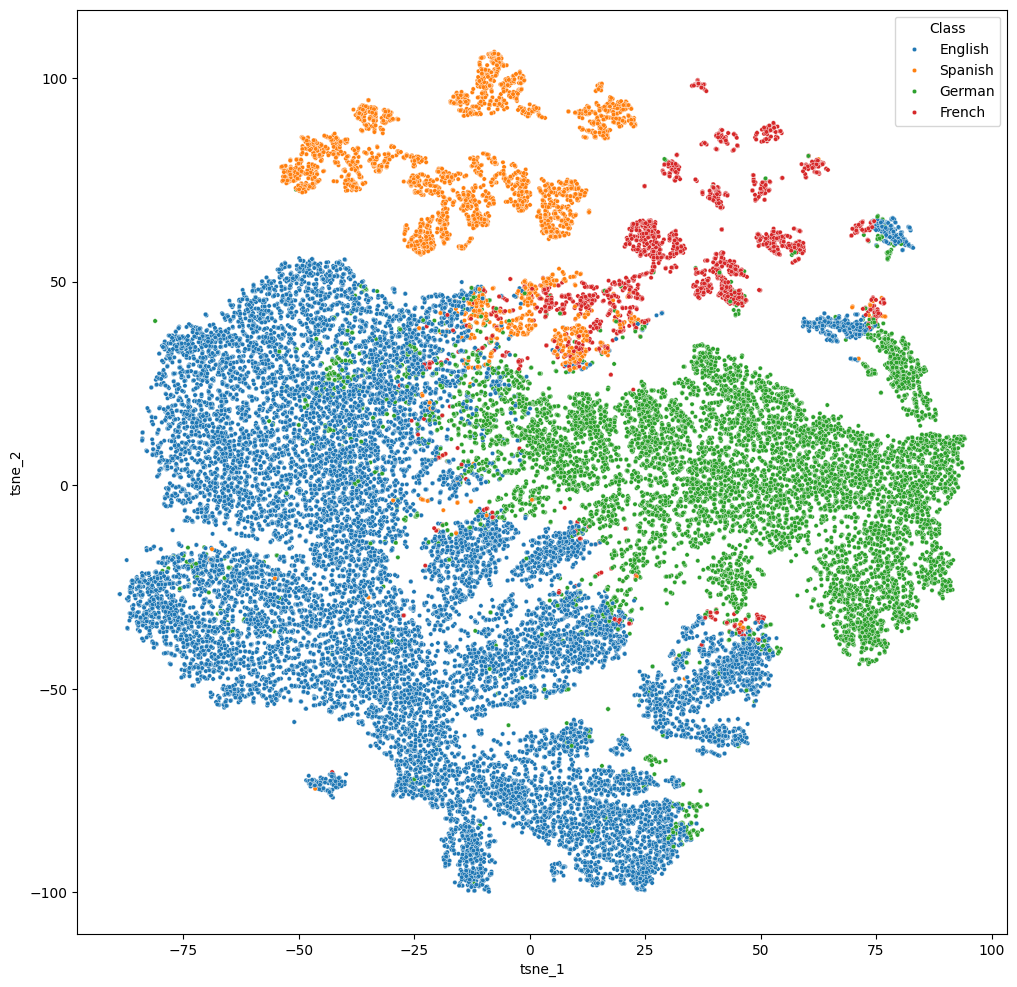

In [25]:
fig = plt.figure(figsize=(12,12))
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df_95, hue = y_train, legend = 'full', s=10)
